<a href="https://colab.research.google.com/github/cpython-projects/121225-ptm/blob/main/lesson_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Що таке розподіл?

**Розподіл** — це спосіб описати, як значення певної змінної «розкидані» у вибірці. Він показує, з якою частотою зустрічаються різні значення.

Наприклад, якщо у нас є дані про вік студентів, то можна побудувати гістограму, щоб побачити розподіл.

<Axes: >

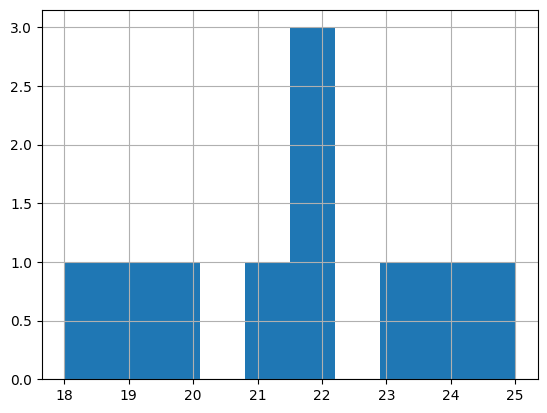

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ages = pd.Series([18, 19, 20, 21, 22, 22, 22, 23, 24, 25])
ages.hist(bins=10)

Розподіл — це відповідь на питання:

> Які значення в стовпці трапляються частіше, які рідше, і як вони «розподілені» вздовж числової осі?

Розподіл — це **структура даних**:

* чи є перекіс?
* чи є рідкісні екстремальні значення?
* чи є кілька груп?
* де знаходиться «центр» даних?

Від форми розподілу залежить:

* які метрики використовувати,
* які моделі застосовувати,
* які тести є коректними,
* як очищати викиди,
* як нормувати дані.

# 2. Які бувають розподіли?

## Модельні (теоретичні)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Нормальний (дзвінкоподібна крива) — **Normal (bell-shaped curve)**

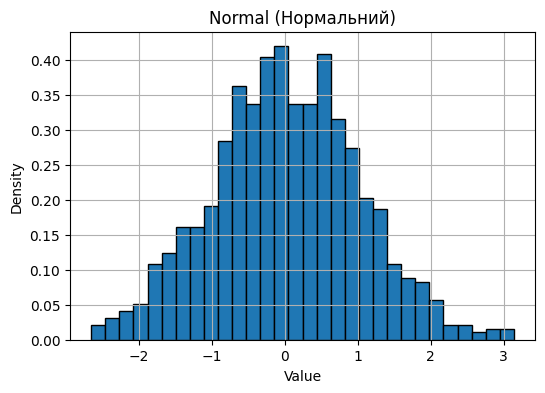

In [2]:
# Нормальний розподіл
data = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Normal (Нормальний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** симетрична дзвінкоподібна (bell curve).
* **Характеристики:** середнє = медіана = мода; більшість значень — біля центру.
* **Де використовується:** зріст людей, IQ, похибки вимірювань, природні процеси.
* **Базовий стандарт.** Часто використовується як "еталон" для порівняння.

### Рівномірний — **Uniform**

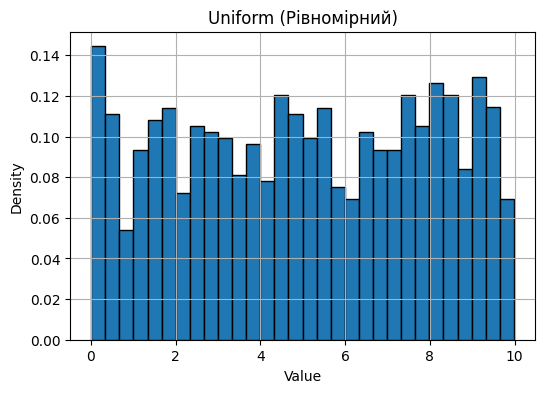

In [3]:
data = np.random.uniform(low=0, high=10, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Uniform (Рівномірний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** прямокутник — усі значення мають однакову ймовірність.
* **Характеристики:** немає переважних значень; повна "невизначеність".
* **Де використовується:** генерація випадкових чисел, первинні гіпотези, випадкові події.
* **Найпростіший розподіл**, використовується як базовий при симуляціях.

### Експоненційний — **Exponential**

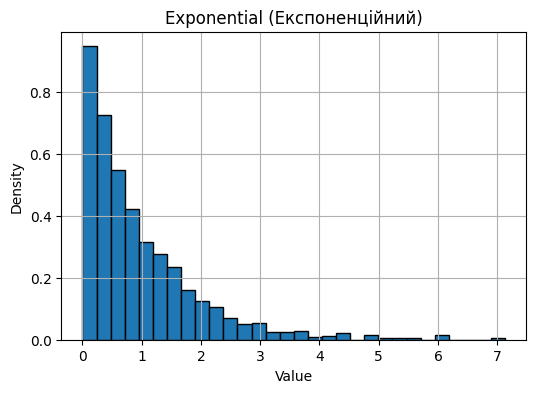

In [4]:
data = np.random.exponential(scale=1.0, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Exponential (Експоненційний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** правосторонньо скошена (right-skewed), максимум у 0, далі швидко спадає.
* **Характеристики:** ймовірність події зменшується з часом.
* **Де використовується:** час до настання наступної події — наприклад, час до розриву деталі або між дзвінками.

### Логнормальний — **Log-normal**

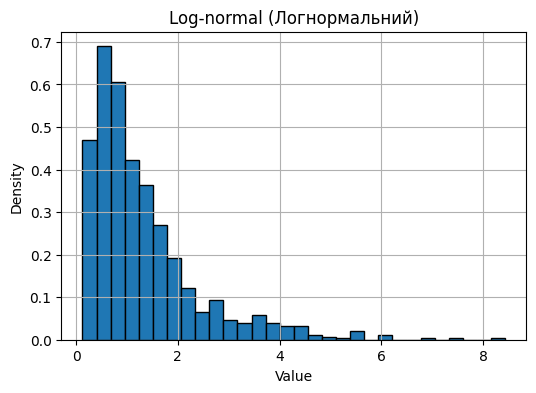

In [9]:
data = np.random.lognormal(mean=0, sigma=0.8, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Log-normal (Логнормальний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** правосторонньо скошена, як «розтягнутий» нормальний розподіл.
* **Характеристики:** логарифм значень має нормальний розподіл.
* **Де використовується:** час виконання задач, доходи, розмір файлів, тривалість проєктів.
* **Візуально схожа на експоненціальний**, але максимум далі від нуля.

**логарифм значень має нормальний розподіл** — це ключова властивість логнормального розподілу:

> Якщо взяти всі значення, застосувати до них логарифм, то отримані числа будуть розподілені **нормально** (як «дзвін»).

Тобто самі значення — **НЕ** нормальні,
але їхні логарифми — нормальні.

---

### Чому так відбувається?

Логарифм — це операція, яка «стискає» великі значення і «розтягує» малі.

Наприклад:

| Значення | Логарифм |
| -------- | -------- |
| 1        | 0        |
| 10       | 2.30     |
| 100      | 4.60     |
| 1000     | 6.90     |

Великий розкид перетворюється на акуратний діапазон.

І якщо в початкових даних **величезний розкид**, але діють **мультиплікативні фактори** (множення), то після логарифмування вони перетворюються на «плюс-мінус симетричні» дані → нормальний розподіл.

---

### Чому логнормальний розподіл трапляється часто?

Тому що в реальному житті багато процесів влаштовані **мультиплікативно**, а не адитивно.

Приклади:

* доходи людей (зростають у %)
* ціни акцій
* час виконання (якщо одна затримка множить термін)
* тривалість сесій в інтернеті
* перегляди, лайки, продажі
* розміри файлів

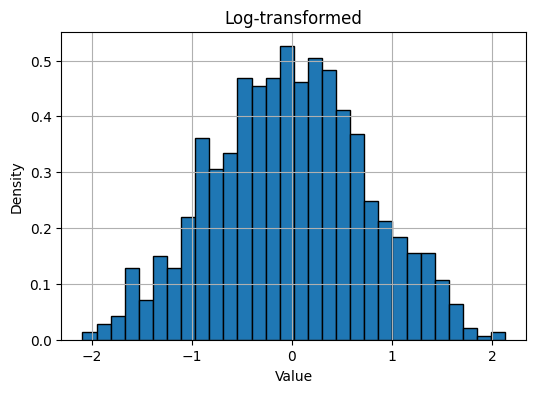

In [11]:
data_log_x = np.log(data) # якщо нулі відсутні

# якщо є нулі
# data_log_x =  np.log1p(data) log(1+x)

plt.figure(figsize=(6, 4))
plt.hist(data_log_x, bins=30, density=True, edgecolor='black')
plt.title("Log-transformed")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Ми застосували **натуральний логарифм** до логнормально розподілених даних, щоб:

* прибрати сильну асиметрію,
* зробити розподіл близьким до нормального,
* коректно застосовувати статистичні методи.

---

## Як інтерпретувати результати після логарифмування

In [12]:
# Середнє в log-шкалі

mu = data_log_x.mean()
print(mu)

# У вихідній шкалі це інтерпретується як **геометричне середнє**:
geo_mean = np.exp(mu)
print(geo_mean)

-0.021754893993649004
0.9784800369957233


In [16]:
# Стандартне відхилення в log-шкалі

sigma = data_log_x.std()
print(sigma)

# Це не стандартне відхилення в одиницях змінної, а мультиплікативний розкид.

factor = np.exp(sigma)
print(factor)

0.7843861016916638
2.1910614388640326


In [17]:
# Інтервал “типових значень”

lower = geo_mean / factor
upper = geo_mean * factor

print(lower, upper)

0.46521160422884067 2.2333647154778085


## Головна ідея

> **У log-шкалі ми рахуємо статистику.
> У вихідній шкалі ми інтерпретуємо результат через множники та відсотки.**

* середнє → **типове значення**
* стандартне відхилення → **у скільки разів коливаються дані**
* різниця середніх → **відсоткова зміна**

### Парето - **Pareto**

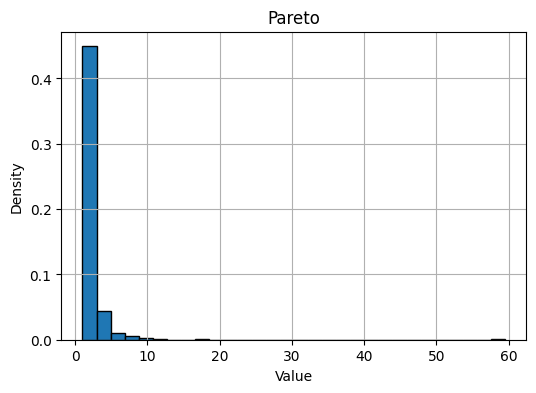

In [18]:
np.random.seed(42)
data = (np.random.pareto(a=2, size=1000) + 1) * 1  # сдвиг, чтобы min=1

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Pareto")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** сильно скошене вправо, «довгий хвіст» — мало великих значень, багато малих.
* **Характеристики:** правило 80/20 — більша частина ефекту (доходів, ресурсів, продажів) створюється невеликою часткою елементів.
* **Де використовується:** моделювання доходів, багатства, розмірів міст, розмірів файлів, ризиків великих втрат.
* **Особливість:** розподіл із «важким хвостом», екстремальні значення трапляються значно частіше, ніж у нормальному або рівномірному розподілі.


### Правосторонньо асиметричний або зі скошеністю вправо — **Right-skewed**

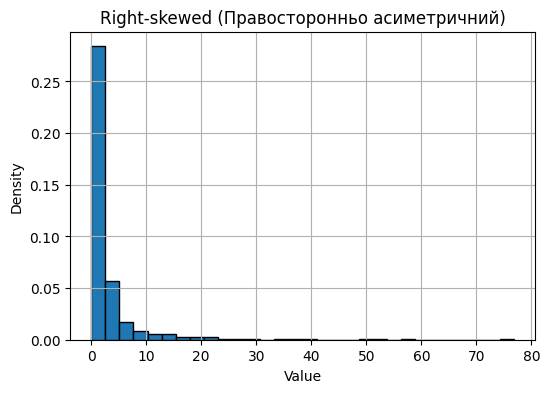

In [ ]:
data = np.random.lognormal(mean=0, sigma=1.5, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Right-skewed (Правосторонньо асиметричний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* **Форма:** будь-який розподіл, у якого хвіст справа довший.
* **Це не конкретний розподіл**, а **властивість** форми.
* **До таких відносяться:** експоненціальний, логнормальний, Парето.
* **У реальному світі більшість «позитивних» величин (тривалість, доходи) саме такі.**


### Пуассонівський — **Poisson**

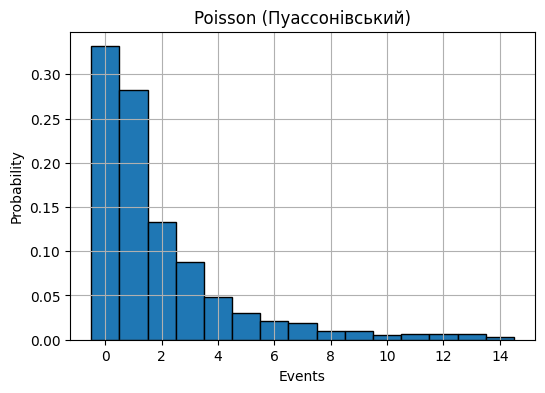

In [ ]:
ata = np.random.poisson(lam=3, size=1000)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=np.arange(-0.5, 15.5, 1), density=True, edgecolor='black')
plt.title("Poisson (Пуассонівський)")
plt.xlabel("Events")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

* **Форма:** дискретна, схожа на скошений нормальний розподіл.
* **Характеристики:** моделює **кількість подій** за фіксований проміжок часу або простору.
* **Де використовується:** моделює кількість подій за фіксований проміжок часу, коли події відбуваються незалежно одна від одної: кількість звернень у кол-центр за годину; кількість покупок за хвилину (якщо потік «розріджений»); кількість ДТП за день на ділянці дороги; кількість відвідувань сайту за секунду (у low-traffic).


### Мультимодальний (тобто розподіл із кількома вершинами/піками) — **Multimodal**

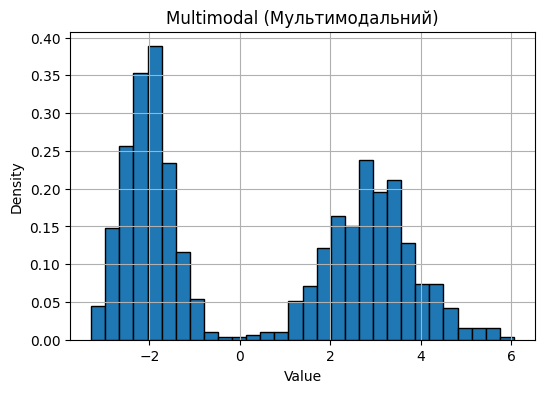

In [ ]:
data1 = np.random.normal(loc=-2, scale=0.5, size=500)
data2 = np.random.normal(loc=3, scale=1.0, size=500)
data = np.concatenate([data1, data2])

plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title("Multimodal (Мультимодальний)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


* **Форма:** має кілька піків (мод) замість одного.
* **Характеристики:** свідчить про **змішаність груп у даних**.
* **Де використовується:** розподіл зарплат у компанії з кількома посадами, результати різних кластерів.
* **Може ввести в оману**, якщо очікувався один "тип" поведінки в даних.

## Реальні (емпіричні)

### Зарплати в ІТ — часто **зміщений вправо** (довгий «хвіст» з великими значеннями)

👉 Основна маса зарплат — у межах 1000–4000 \$, але є топ-менеджери з 10k–20k+

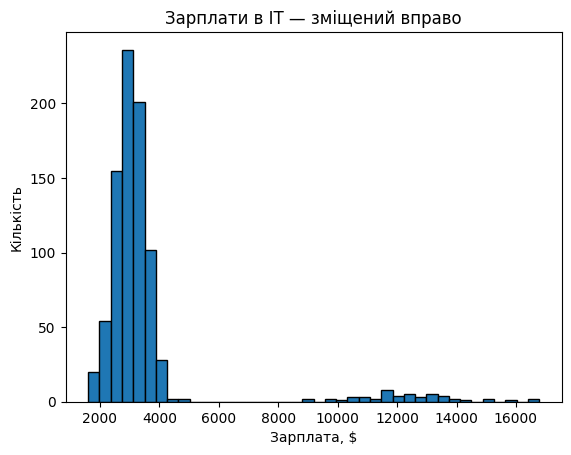

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Більшість зарплат — середні
middle = np.random.normal(3000, 500, 800)

# Топи — менші, але значно більші значення
high = np.random.normal(12000, 2000, 50)

# Об’єднання і візуалізація
salaries = np.concatenate([middle, high])

plt.hist(salaries, bins=40, edgecolor='black')
plt.title("Зарплати в ІТ — зміщений вправо")
plt.xlabel("Зарплата, $")
plt.ylabel("Кількість")
plt.show()

**Що бачимо**:

* Основна маса зліва
* Довгий «хвіст» праворуч
* Середнє не показує «типову» зарплату → краще дивитися на **медіану** або **Q1–Q3**


### Оцінки студентів — часто **трапецієподібний**

👉 Часто оцінки «склеюються» вгорі: більшість студентів отримують 4–5

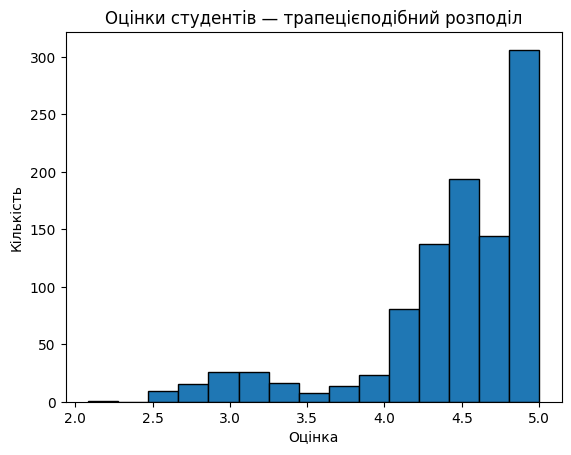

In [ ]:
grades = np.concatenate([
    np.random.normal(3, 0.3, 100),   # частина слабших
    np.random.normal(4.5, 0.3, 700), # більшість
    np.random.normal(5, 0.1, 200)    # відмінники
])

grades = np.clip(grades, 2, 5)  # обмежуємо до 5-бальної шкали

plt.hist(grades, bins=15, edgecolor='black')
plt.title("Оцінки студентів — трапецієподібний розподіл")
plt.xlabel("Оцінка")
plt.ylabel("Кількість")
plt.show()

**Що бачимо**:

* Дані скупчені ближче до 4–5
* Може бути плато → **трапеція**
* У таких випадках середнє **майже не змінюється**, але краще дивитись на **Q1, Q3**, або будувати **boxplot**


### Кількість покупок клієнта — **розріджений**, часто **експоненційний** або **з нульовим модусом**

👉 Більшість клієнтів купують 0–1 раз, меншість — 10+

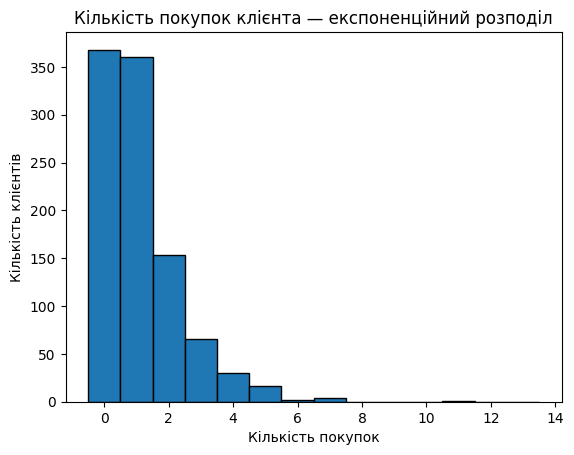

In [ ]:
purchases = np.random.exponential(scale=1.2, size=1000)
purchases = np.round(purchases)

plt.hist(purchases, bins=range(0, 15), align='left', edgecolor='black')
plt.title("Кількість покупок клієнта — експоненційний розподіл")
plt.xlabel("Кількість покупок")
plt.ylabel("Кількість клієнтів")
plt.show()


**Що бачимо**:

* Дуже багато клієнтів купили **0 або 1 раз**
* Хвіст довгий, але **частота різко спадає**
* Середнє не репрезентативне → краще рахувати **конверсію**, **медіану**, або **побудувати частоти на кластери**

# 3. Навіщо аналітику визначати розподіл даних по стовпцю?

## **1. Вибір коректних статистичних методів**

Різні розподіли потребують різних підходів:

* **Нормальний розподіл** → можна використовувати середнє, стандартне відхилення, t-тести, кореляції Пірсона.
* **Скошений розподіл** → середнє вже вводить в оману → краще використовувати медіану, IQR, рангові тести, лог-трансформацію.
* **Мультимодальний** → вказує на наявність різних груп всередині даних → перед моделюванням їх потрібно розділити.

**Якщо не знаєш розподіл — можеш обрати неправильний метод і отримати хибні висновки.**

---

## **2. Розуміння природи та поведінки даних**

Розподіл показує характер явища:

* Чи є **пороговий ефект**?
* Чи є **рідкісні, екстремальні події** (heavy tails)?
* Значення розподілені рівномірно чи є кластери?

Наприклад: продажі, час обробки заявок, доходи — майже завжди **право-скошені**. Це нормальна логіка бізнесу, і аналітик повинен її розуміти.

---

## **3. Виявлення викидів**

Викиди можуть бути:

* помилками введення (200 років вік клієнта),
* природними екстремальними значеннями (VIP-клієнти),
* або маркерами аномалій для детектування.

Але ти можеш побачити викиди **тільки**, якщо розумієш форму розподілу.

---

## **4. Коректна візуалізація**


# 4. Чи достатньо тільки візуалізації для визначення типу розподілу?

**Ні, не завжди.**

**Візуалізації достатньо у двох випадках:**

* явна нормальність/сильна скошеність/бімодальність видно неозброєним оком;
* розподіл чистий і вибірка велика.

**Візуалізації НЕ достатньо, якщо:**

* мало даних — гістограма буде вводити в оману;
* є важкі «хвости», непомітні на звичних масштабах;
* потрібне формальне статистичне обґрунтування.


# 5. Що таке стандартне відхилення?

**Стандартне відхилення** — це **середня відстань** значень від середнього.

* Якщо значення «тримаються купою» навколо середнього — відхилення маленьке.
* Якщо багато значень сильно відрізняються — велике.

---

**Формула**

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 }
$$

* n – кількість значень у наборі даних (розмір вибірки)
* xᵢ – i-й елемент набору даних
* $\bar{x}$ – середнє арифметичне всіх $x_i$

---

**Стандартне відхилення:**

* показує **розкид** значень
* дозволяє будувати **довірчі інтервали** (діапазон, у якому з певною ймовірністю знаходиться істинне середнє генеральної сукупності)
* критично для **нормального розподілу**

⚠️ **Усе це — тільки якщо дані приблизно нормально розподілені!**

---

**Коли на нього дивитися:**

| Ситуація                               | Чи варто дивитися на std?     |
| -------------------------------------- | ----------------------------- |
| Дані нормально розподілені             | ✅ Так, повна сила std         |
| Дані приблизно симетричні, без викидів | ✅ Можна використовувати       |
| Є зміщення або асиметрія               | ⚠️ Обережно                   |
| Є викиди або «важкий хвіст»            | ❌ Середнє та std нерелевантні |

## Що означає ±1σ, ±2σ, ±3σ?

Це **інтервали навколо середнього**, які у нормальному розподілі мають особливе значення:

| Інтервал             | Скільки даних всередині (≈) |
| -------------------- | --------------------------- |
| **[μ − 1σ, μ + 1σ]** | ~68% значень                |
| **[μ − 2σ, μ + 2σ]** | ~95% значень                |
| **[μ − 3σ, μ + 3σ]** | ~99.7% значень              |

🔔 Працює **тільки для нормального розподілу!**

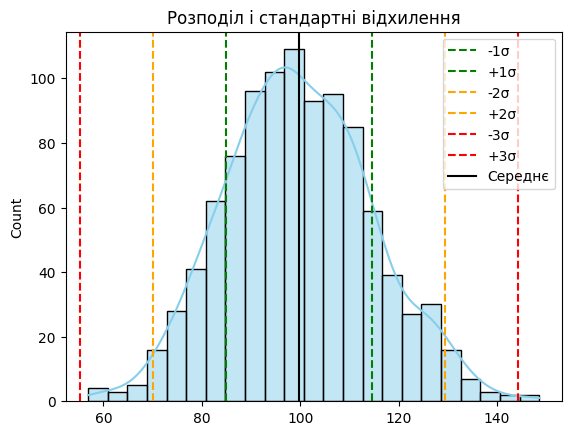

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.normal(100, 15, 1000)

sns.histplot(data, kde=True, color='skyblue')
mean = np.mean(data)
std = np.std(data)

for i, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(mean - i*std, linestyle='--', color=color, label=f'-{i}σ')
    plt.axvline(mean + i*std, linestyle='--', color=color, label=f'+{i}σ')

plt.axvline(mean, color='black', label='Середнє')
plt.legend()
plt.title("Розподіл і стандартні відхилення")
plt.show()


## **Коефіцієнт варіації (Coefficient of Variation, CV)** — це **відносна міра розкиду даних**, яка показує, наскільки сильно варіюються значення відносно свого середнього.

Його часто називають *«нормалізованим стандартним відхиленням»*.

---

### **Формула**

$$
CV = \frac{\sigma}{\bar{x}}
$$

* Зазвичай виражають у відсотках:

$$
CV = \frac{\sigma}{\bar{x}} \cdot 100%
$$

---

### **Інтерпретація**

Коефіцієнт варіації показує:

> **яка частка середнього становить стандартне відхилення.**

Приклад:
Якщо CV = 0.25 → це означає, що розкид становить 25% від середнього.

---

### **Коли CV корисний?**

**1. Порівняння розкиду різних показників**

Якщо два показники мають різні шкали, їх SD порівнювати не можна, а CV — можна.

Приклад:

* коливання цін на золото (у доларах)
* коливання курсу валют (у відсотках)
  CV дозволяє порівнювати стабільність різних ринків.

**2. Аналіз якості вимірювань**

* Високий CV → низька стабільність.
* Низький CV → вимірювання точні та повторювані.

**3. В аналізі продажів, попиту, ризиків**

* низький CV → показник стабільний;
* високий CV → поведінка непередбачувана.

---

### **Коли CV НЕ варто використовувати**

1. **Якщо середнє близьке до нуля**
   CV починає «вибухати» і стає безглуздим.

2. **Якщо середнє від’ємне**
   CV втрачає сенс.

3. **Для розподілів, де середнє погано характеризує центр**
   Наприклад, важкі хвости.

# 6. Що таке Z-score?

**Z-score (стандартне відхилення)** показує, **на скільки σ (стандартних відхилень)** елемент відрізняється від середнього значення.

$$
Z = \frac{x - \mu}{\sigma}
$$

* $x$ — значення,
* $\mu$ — середнє значення (mean),
* $\sigma$ — стандартне відхилення (standard deviation)

---

## Як інтерпретувати Z-score:

| Z-score      | Інтерпретація                                                   |
| ------------ | --------------------------------------------------------------- |
| ≈ 0          | Значення близьке до середнього                                  |
| > 1 або < -1 | Далеко від середнього                                           |
| > 2 або < -2 | Можлива аномалія                                                |
| > 3 або < -3 | Ймовірна аномалія (у нормальному розподілі таких значень <0.3%) |


In [13]:
from scipy.stats import zscore
import statistics
x = [10, 12, 14, 15, 16, 17, 200]
z = zscore(x)

print(statistics.mean(x))
print(x)
print(z)

40.57142857142857
[10, 12, 14, 15, 16, 17, 200]
[-0.46943598 -0.43872521 -0.40801445 -0.39265907 -0.37730368 -0.3619483
  2.4480867 ]


In [14]:
for xi, zi in zip(x, z):
    print(f"x = {xi}, z = {zi:.2f}")

x = 10, z = -0.47
x = 12, z = -0.44
x = 14, z = -0.41
x = 15, z = -0.39
x = 16, z = -0.38
x = 17, z = -0.36
x = 200, z = 2.45


Ті значення, де $|z| > 3$, — кандидати на викиди.


## Коли **не варто** використовувати Z-score?

| Проблема                                | Причина                                   |
| --------------------------------------- | ----------------------------------------- |
| Дані мають сильні викиди                | Середнє і σ спотворюються                 |
| Розподіл сильно ненормальний            | Z-score втрачає статистичний сенс         |
| Дані категоріальні або сильно дискретні | Z-score не підходить для нечислових даних |

Альтернатива для нестандартних розподілів — IQR


# 7. Квантілі, квартили та міжквартильний розмах (IQR)

## **1. Квантілі (quantiles)**

**Квантілі** — це точки поділу розподілу на частини з однаковою ймовірністю.

> Простіше: квантиль — це значення, нижче якого знаходиться певний відсоток даних.

### Приклади:

* 0.25-квантиль → 25% даних менше або дорівнює цьому значенню
* 0.5-квантиль → медіана (50% даних)
* 0.75-квантиль → 75% даних менше або дорівнює цьому значенню

### Важливі квантілі:

| Квантиль                | Що показує        | Коли використовується                     |
| ----------------------- | ----------------- | ----------------------------------------- |
| 0.5 (медіана)           | Центр розподілу   | Коли дані скошені або є викиди            |
| 0.25 і 0.75             | Межі середніх 50% | Для IQR, оцінки розкиду та викидів        |
| 0.1, 0.9 або 0.05, 0.95 | Хвости            | Для оцінки екстремальних значень, ризиків |
| 0.01, 0.99              | Дуже рідкі події  | Фінансовий ризик, аномалії                |

### Python приклад:

```python
import numpy as np

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

q25 = np.quantile(data, 0.25)  # 25% квантиль
q50 = np.quantile(data, 0.50)  # медіана
q75 = np.quantile(data, 0.75)  # 75% квантиль

print(q25, q50, q75)  # 3.25, 5.5, 7.75
```

**Примітка:** сортувати дані вручну **не потрібно**, функції NumPy / Pandas роблять це автоматично.

---

## **2. Квартили (quartiles)**

**Квартили** — це частковий випадок квантилів: дані діляться на **четверті**.

* **1-й квартиль (Q1)** = 25%-квантиль
* **2-й квартиль (Q2)** = 50%-квантиль = медіана
* **3-й квартиль (Q3)** = 75%-квантиль

Тобто **квартиль = одне з трьох поділів даних на 4 рівні частини**.

> Назва пов’язана зі словом **“квартал”** — чверть розподілу.

**Сенс для аналітика:**

* Q1, Q2, Q3 показують, де знаходяться **центральні частини даних**
* Корисно для оцінки **розкиду**, виявлення **викидів** та побудови **boxplot**

---

## **3. Міжквартильний розмах (IQR — Interquartile Range)**

**IQR = Q3 − Q1**

* Показує діапазон, де знаходяться **середні 50% даних**
* Стійкий до викидів (на відміну від повного діапазону min-max)
* Використовується для:

  * виявлення викидів
  * візуалізації (boxplot)
  * оцінки розкиду без впливу екстремальних значень

### Python приклад:

```python
iqr = q75 - q25
print("IQR:", iqr)  # 7.75 - 3.25 = 4.5
```

**Викиди можна визначити так:**

```python
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Викиди:", outliers)
```


## Візуалізація

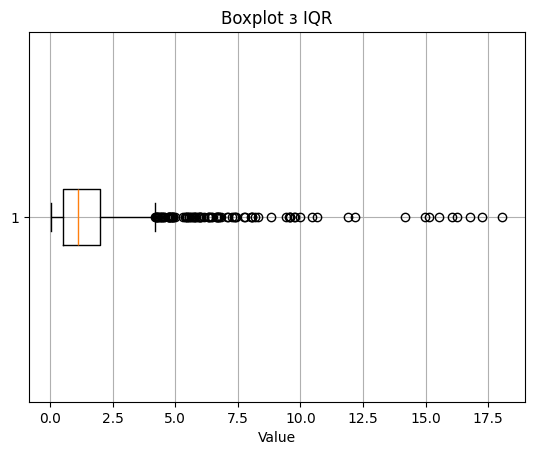

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.lognormal(mean=0, sigma=1.0, size=1000)

plt.boxplot(data, vert=False)
plt.title("Boxplot з IQR")
plt.xlabel("Value")
plt.grid(True)
plt.show()


Boxplot наочно показує:

* **Медіану** (середню лінію)
* **Q1, Q3** — краї «коробки»
* **IQR** — ширина коробки
* **вуса** — межі без викидів
* **викиди** — точки поза межами

## Чому IQR важливий аналітикам

| Причина                                             | Пояснення                                           |
| --------------------------------------------------- | --------------------------------------------------- |
| Стійкий до викидів                                  | На відміну від дисперсії чи стандартного відхилення |
| Дає уявлення про "нормальний" діапазон              | Середні 50% — найтиповіші                           |
| Універсальний — працює для будь-яких форм розподілу | Симетричних, скошених, тощо                         |

---

* **IQR** — один із ключових показників у **EDA (Exploratory Data Analysis)**
* Він дозволяє **оцінити структуру даних**, незалежно від того, чи розподіл нормальний чи ні

In [15]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [17]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: >

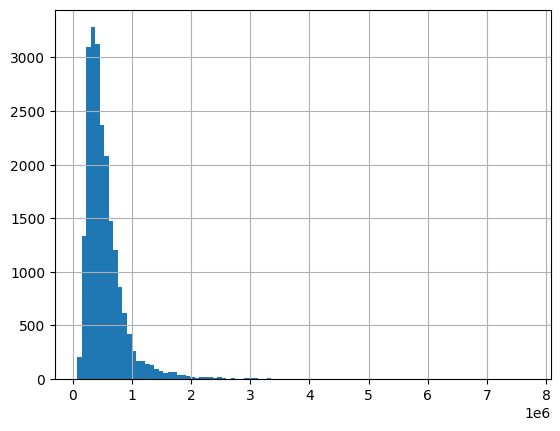

In [19]:
df.price.hist(bins=100)

In [20]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

In [21]:
q1, q3

(np.float64(321950.0), np.float64(645000.0))

In [22]:
IQR = q3 - q1

In [23]:
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
print(lower, upper)

-162625.0 1129575.0


In [24]:
df.price.min()

75000.0

In [25]:
df_new = df[df.price <= upper]

<Axes: >

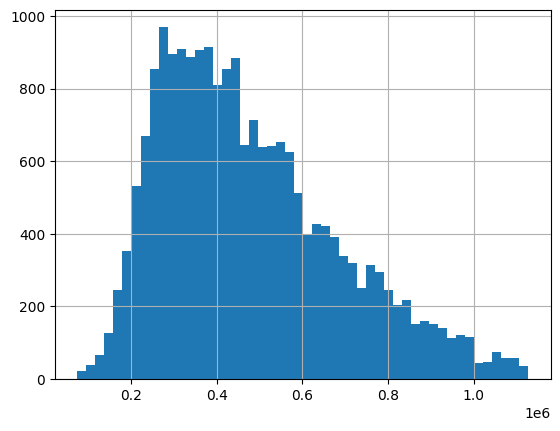

In [27]:
df_new.price.hist(bins=50)

In [28]:
df.shape

(21613, 21)

In [29]:
df_new.shape

(20467, 21)

In [30]:
df_2 = df[df.price > upper]

<Axes: >

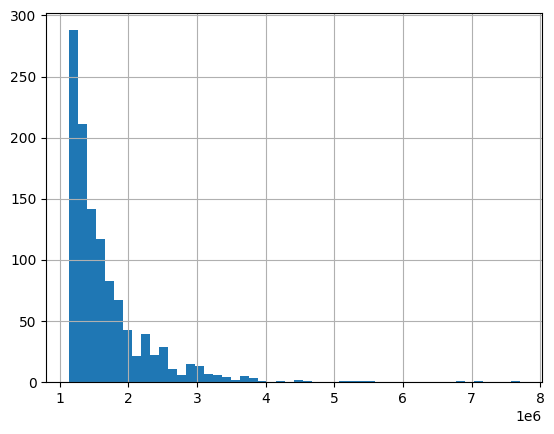

In [31]:
df_2.price.hist(bins=50)